In [30]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics
import pandas as pd
import seaborn as sns
from tensorflow import keras
from plotly.subplots import make_subplots
import plotly.express as px

### Linear regression ###

We call Y the dependent variable and X is the independent variable or the predictor of Y. To get used with the terminology:



### Rigde regression ###

When speaking of linear regression there are some problems that we might encounter. First of all the formula that explains it is:
$$\mathcal{L}({\beta}) = \sum_{i=1}^{n} \left(y_i - \hat{y}_i \right)^2 + \lambda \sum_{j=1}^{p} \beta_j^2
$$
where,
- $y_i$ is the true value
- $\hat{y_i}$ is the predicted value
- $\beta_j$ are the model coeff
- $\lambda$ is the regularization strength
- $n$ is the number of samples, $p$ is the number of features

The idea behind is that we can address **the issue of multicollinearity among predictor variables.** The first part of our equation if the **OLS(ordinary least squares)** and the second part is a **regularization term, reducing variance by penalizing large coeffs**

The other issue that we are fighting against is **overfitting**. The introduced regularization term allows us to use smaller coefficients and thus ignore more or less noise allowing for a better explanation of the data. When lambda increases we shrink the coeffs of correlated features reducing the effect of multicollinearity. 
To understand better look at the following picture:
![Ridge](https://www.statology.org/wp-content/uploads/2020/11/ridge2-1024x733.png)

From the graph we see something called **Bias-Variance tradeoff.** The whole idea of the Ridge regression is to make a model that can describe the data well. However sometimes choosing the lowest possible bias, for example using LSE could lead to high variance in the testing data. Therefore we adjust the lambda parameter in orther to achieve a good balance. **No overfitting, no underfitting**. 

### Choosing the parameter ###

As we already aid choosing the $\lambda$ parameter is the key to a good Ridge regression. There are a couple of methods we could do that. The most popular one is using **cross-validation.**

The idea behind cross validation is that we divide the data into subsets, train on some, test on the other.

### Lasso regression ###

Lasso regression(L1 regularization) is another method that is often used when we have lots of features, want to deal with the problem of multicollinearity, have little training data. However it handles the issues in different manners. The formula for the lasso regression is:$$
\mathcal{L}(\boldsymbol{\beta}) = \sum_{i=1}^{n} \left(y_i - \hat{y}_i \right)^2 + \lambda \sum_{j=1}^{p} \left| \beta_j \right|
$$


The main difference between Ridge and Lasso regression is that Lasso regression allows for some of the parameters to be equal to zero, whereas Ridge regression only reduces them asymptotically to zero. This is to say that Lasso regression is appropriate for cases when we know that we have some important features and the others hardly contribute. However when we know that all the features might have some importance Ridge regression is the better approach.

Now we are going to give some practical examples of the things we discussed.

In [5]:


X, y, coef = make_regression(
    n_samples=100,
    n_features = 20,
    n_informative=5,
    noise = 10.0,
    coef=True,
    random_state=20
)

#printing the true coefs
print("Real coefs:", coef)
ridge = Ridge(alpha=1.0)
ridge.fit(X,y)

lasso = Lasso(alpha=1.0)
lasso.fit(X,y)

print("Ridge coeff:",ridge.coef_)
print("Lasso coeff:",lasso.coef_)

Real coefs: [79.974115    0.          0.         28.46204847  0.          0.
 63.44214434  0.          0.          0.          0.          0.
 51.42269599 37.8351338   0.          0.          0.          0.
  0.          0.        ]
Ridge coeff: [77.4188929   0.34779454  0.63871091 27.9557937  -1.36718829  0.13404866
 63.64122841 -0.37268619 -0.62009397  0.81802046  2.26065874  1.08593548
 49.82999059 37.32125818  1.4488047   1.36110052  1.17255623  0.59474837
  1.06022422  2.09383751]
Lasso coeff: [77.64215846  0.          0.         27.15078503 -0.46143604 -0.
 63.42104627 -0.         -0.          0.          1.42735036  0.52329546
 49.68197168 36.65441557  0.63270716  0.18967176  0.         -0.
  0.          0.89626653]


As we see from this example both the ridge and lasso coeffs were able to fit nicely. However, as we already discussed, lasso was able to remove some of the features completely, whereas ridge only reduced them asymptotically towards 0.

Now let us see which features the lasso finds unnecessary.

In [17]:
zero_coeffs = np.where(lasso.coef_ == 0)[0]
print("\nLasso eliminated feature indices:", zero_coeffs)



Lasso eliminated feature indices: [ 1  2  5  7  8  9 16 17 18]


In the code above we have already specified the **alpha** (**lambda**) best for the the fit. However we don't know what it is in general. We are going to use **cross-validation** to decide.



In [18]:
alphas = [0.01,0.1,1,10,100]

ridge_cv = RidgeCV(alphas=alphas,cv = 5)
ridge_cv.fit(X,y)

print("Best alpha for Ridge:",ridge_cv.alpha_)

lasso_cv = LassoCV(alphas=alphas,cv=5)
lasso_cv.fit(X,y)

print("Best alphas for Lasso:",lasso_cv.alpha_)

Best alpha for Ridge: 1.0
Best alphas for Lasso: 1.0


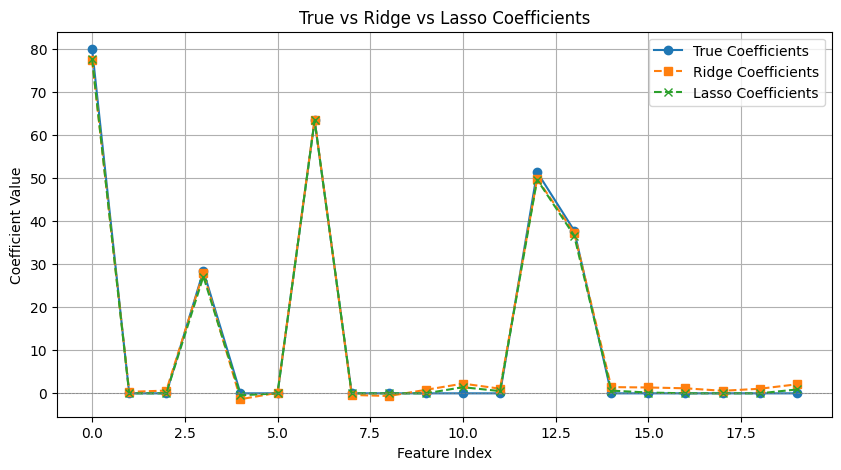

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(coef, 'o-', label='True Coefficients')
plt.plot(ridge.coef_, 's--', label='Ridge Coefficients')
plt.plot(lasso.coef_, 'x--', label='Lasso Coefficients')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.title("True vs Ridge vs Lasso Coefficients")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.show()

**This shows us that ridge and Lasso were both able to find the right coeffs.**

## Example of a linear regression model



In [4]:
chicago_taxi_dataset = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv")


        TRIP_START_TIMESTAMP      TRIP_END_TIMESTAMP  TRIP_START_HOUR  \
0      05/17/2022 7:15:00 AM   05/17/2022 7:45:00 AM             7.25   
1      05/17/2022 5:15:00 PM   05/17/2022 5:30:00 PM            17.25   
2      05/17/2022 5:15:00 PM   05/17/2022 5:30:00 PM            17.25   
3      05/17/2022 6:00:00 PM   05/17/2022 7:00:00 PM            18.00   
4      05/17/2022 5:00:00 PM   05/17/2022 5:30:00 PM            17.00   
...                      ...                     ...              ...   
31689  05/17/2022 1:15:00 PM   05/17/2022 1:30:00 PM            13.25   
31690  05/17/2022 9:45:00 PM  05/17/2022 10:15:00 PM            21.75   
31691  05/18/2022 3:45:00 AM   05/18/2022 4:00:00 AM             3.75   
31692  05/16/2022 2:45:00 PM   05/16/2022 3:30:00 PM            14.75   
31693  05/16/2022 9:30:00 PM  05/16/2022 10:00:00 PM            21.50   

       TRIP_SECONDS  TRIP_MILES  TRIP_SPEED  PICKUP_CENSUS_TRACT  \
0              2341        2.57         4.0            

In [6]:
training_df = chicago_taxi_dataset[['TRIP_MILES', 'TRIP_SECONDS', 'FARE', 'COMPANY', 'PAYMENT_TYPE', 'TIP_RATE']]

print('Read dataset completed successfully.')
print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.head(200)

Read dataset completed successfully.
Total number of rows: 31694




,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
0,2.57,2341,31.99,Flash Cab,Mobile,6.3
1,1.18,1074,9.75,Flash Cab,Credit Card,27.9
2,1.29,1173,10.25,Sun Taxi,Cash,0.0
3,3.70,3360,23.75,Choice Taxi Association,Cash,0.0
4,1.15,1044,10.00,Flash Cab,Cash,0.0
...,...,...,...,...,...,...
195,1.13,821,9.00,Blue Ribbon Taxi Association,Mobile,22.9
196,0.57,414,6.00,Flash Cab,Cash,0.0
197,1.22,886,9.00,City Service,Cash,0.0
198,1.68,1219,9.00,Sun Taxi,Mobile,23.0


In [8]:
print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.describe(include='all')

Total number of rows: 31694




,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
count,31694.000000,31694.000000,31694.000000,31694,31694,31694.000000
unique,NaN,NaN,NaN,31,7,NaN
top,NaN,NaN,NaN,Flash Cab,Credit Card,NaN
freq,NaN,NaN,NaN,7887,14142,NaN
mean,8.289463,1319.796397,23.905210,NaN,NaN,12.965785
std,7.265672,928.932873,16.970022,NaN,NaN,15.517765
min,0.500000,60.000000,3.250000,NaN,NaN,0.000000
25%,1.720000,548.000000,9.000000,NaN,NaN,0.000000
50%,5.920000,1081.000000,18.750000,NaN,NaN,12.200000
75%,14.500000,1888.000000,38.750000,NaN,NaN,20.800000


In [12]:
print(training_df["FARE"].max())
print(f"The trip miles mean is {training_df['TRIP_MILES'].mean()}")
print(f"The number of unique companies is {training_df['COMPANY'].nunique()}")
print(f"The most frequent payment type is {training_df['PAYMENT_TYPE'].value_counts().idxmax()}")
missing_values = training_df.isnull().sum().sum()
print("Are any features missing data? \t\t\t\tAnswer:", "No" if missing_values == 0 else "Yes")

159.25
The trip miles mean is 8.289462674323214
The number of unique companies is 31
The most frequent payment type is Credit Card
Are any features missing data? 				Answer: No


In [13]:
training_df.corr(numeric_only=True)

,TRIP_MILES,TRIP_SECONDS,FARE,TIP_RATE
TRIP_MILES,1.000000,0.800855,0.975344,-0.049594
TRIP_SECONDS,0.800855,1.000000,0.830292,-0.084294
FARE,0.975344,0.830292,1.000000,-0.070979
TIP_RATE,-0.049594,-0.084294,-0.070979,1.000000


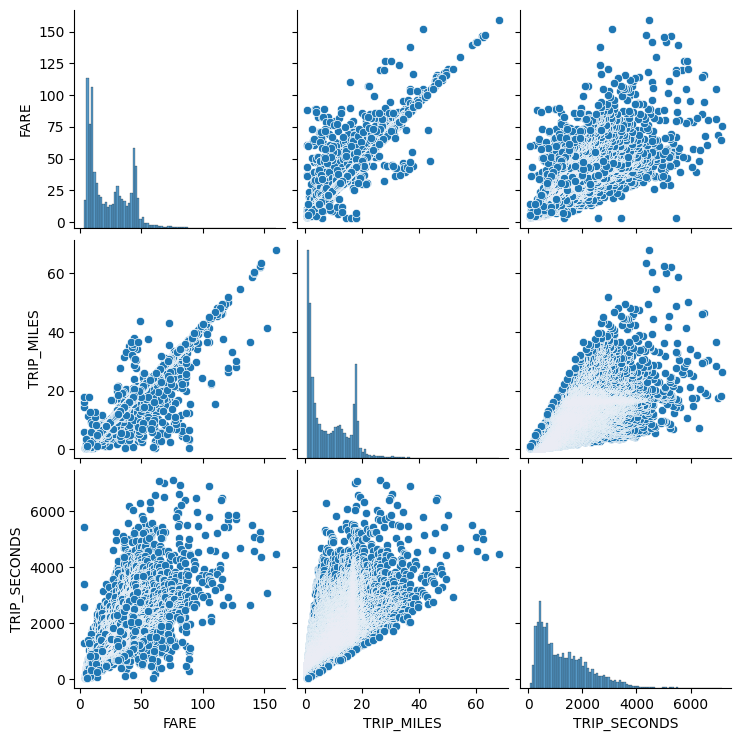

In [15]:
sns.pairplot(training_df, x_vars=["FARE", "TRIP_MILES", "TRIP_SECONDS"], y_vars=["FARE", "TRIP_MILES", "TRIP_SECONDS"])

In [16]:
def make_plots(df, feature_names, label_name, model_output, sample_size=200):

  random_sample = df.sample(n=sample_size).copy()
  random_sample.reset_index()
  weights, bias, epochs, rmse = model_output

  is_2d_plot = len(feature_names) == 1
  model_plot_type = "scatter" if is_2d_plot else "surface"
  fig = make_subplots(rows=1, cols=2,
                      subplot_titles=("Loss Curve", "Model Plot"),
                      specs=[[{"type": "scatter"}, {"type": model_plot_type}]])

  plot_data(random_sample, feature_names, label_name, fig)
  plot_model(random_sample, feature_names, weights, bias, fig)
  plot_loss_curve(epochs, rmse, fig)

  fig.show()
  return

def plot_loss_curve(epochs, rmse, fig):
  curve = px.line(x=epochs, y=rmse)
  curve.update_traces(line_color='#ff0000', line_width=3)

  fig.append_trace(curve.data[0], row=1, col=1)
  fig.update_xaxes(title_text="Epoch", row=1, col=1)
  fig.update_yaxes(title_text="Root Mean Squared Error", row=1, col=1, range=[rmse.min()*0.8, rmse.max()])

  return

def plot_data(df, features, label, fig):
  if len(features) == 1:
    scatter = px.scatter(df, x=features[0], y=label)
  else:
    scatter = px.scatter_3d(df, x=features[0], y=features[1], z=label)

  fig.append_trace(scatter.data[0], row=1, col=2)
  if len(features) == 1:
    fig.update_xaxes(title_text=features[0], row=1, col=2)
    fig.update_yaxes(title_text=label, row=1, col=2)
  else:
    fig.update_layout(scene1=dict(xaxis_title=features[0], yaxis_title=features[1], zaxis_title=label))

  return

def plot_model(df, features, weights, bias, fig):
  df['FARE_PREDICTED'] = bias[0]

  for index, feature in enumerate(features):
    df['FARE_PREDICTED'] = df['FARE_PREDICTED'] + weights[index][0] * df[feature]

  if len(features) == 1:
    model = px.line(df, x=features[0], y='FARE_PREDICTED')
    model.update_traces(line_color='#ff0000', line_width=3)
  else:
    z_name, y_name = "FARE_PREDICTED", features[1]
    z = [df[z_name].min(), (df[z_name].max() - df[z_name].min()) / 2, df[z_name].max()]
    y = [df[y_name].min(), (df[y_name].max() - df[y_name].min()) / 2, df[y_name].max()]
    x = []
    for i in range(len(y)):
      x.append((z[i] - weights[1][0] * y[i] - bias[0]) / weights[0][0])

    plane=pd.DataFrame({'x':x, 'y':y, 'z':[z] * 3})

    light_yellow = [[0, '#89CFF0'], [1, '#FFDB58']]
    model = go.Figure(data=go.Surface(x=plane['x'], y=plane['y'], z=plane['z'],
                                      colorscale=light_yellow))

  fig.add_trace(model.data[0], row=1, col=2)

  return

def model_info(feature_names, label_name, model_output):
  weights = model_output[0]
  bias = model_output[1]

  nl = "\n"
  header = "-" * 80
  banner = header + nl + "|" + "MODEL INFO".center(78) + "|" + nl + header

  info = ""
  equation = label_name + " = "

  for index, feature in enumerate(feature_names):
    info = info + "Weight for feature[{}]: {:.3f}\n".format(feature, weights[index][0])
    equation = equation + "{:.3f} * {} + ".format(weights[index][0], feature)

  info = info + "Bias: {:.3f}\n".format(bias[0])
  equation = equation + "{:.3f}\n".format(bias[0])

  return banner + nl + info + nl + equation

print("SUCCESS: defining plotting functions complete.")

SUCCESS: defining plotting functions complete.


In [17]:
#@title Code - Define ML functions

def build_model(my_learning_rate, num_features):
  """Create and compile a simple linear regression model."""
  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  inputs = keras.Input(shape=(num_features,))
  outputs = keras.layers.Dense(units=1)(inputs)
  model = keras.Model(inputs=inputs, outputs=outputs)

  # Compile the model topography into code that Keras can efficiently
  # execute. Configure training to minimize the model's mean squared error.
  model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, features, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs.
  history = model.fit(x=features,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch

  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch.
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse


def run_experiment(df, feature_names, label_name, learning_rate, epochs, batch_size):

  print('INFO: starting training experiment with features={} and label={}\n'.format(feature_names, label_name))

  num_features = len(feature_names)

  features = df.loc[:, feature_names].values
  label = df[label_name].values

  model = build_model(learning_rate, num_features)
  model_output = train_model(model, features, label, epochs, batch_size)

  print('\nSUCCESS: training experiment complete\n')
  print('{}'.format(model_info(feature_names, label_name, model_output)))
  make_plots(df, feature_names, label_name, model_output)

  return model

print("SUCCESS: defining linear regression functions complete.")

SUCCESS: defining linear regression functions complete.


In [31]:
#@title Code - Experiment 1

# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 20
batch_size = 50

# Specify the feature and the label.
features = ['TRIP_MILES']
label = 'FARE'

model_1 = run_experiment(training_df, features, label, learning_rate, epochs, batch_size)

INFO: starting training experiment with features=['TRIP_MILES'] and label=FARE

Epoch 1/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 285.0334 - root_mean_squared_error: 16.8523
Epoch 2/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 101.4954 - root_mean_squared_error: 10.0297
Epoch 3/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 24.1148 - root_mean_squared_error: 4.8986
Epoch 4/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 18.8256 - root_mean_squared_error: 4.3355
Epoch 5/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 17.3688 - root_mean_squared_error: 4.1606
Epoch 6/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 15.7877 - root_mean_squared_error: 3.9695
Epoch 7/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 14.3026 - root_mean_squared_error: 3.7778
Epoch 8/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 13.6630 - root_mean_squared_error: 3.6925
Epoch 9/20
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 14.6172 - root_mean_squared_error: 3.817

### Logistic regression ###

After looking at linear regression and regularization techniques it is time that we look at logistic regression. Logistic regression **is a supervised machine learning algorithm** that we use when we need to decide the probability of an instance belonging to a class. It is often used for **binary classification.**

#### key ideas: ####
- Instead of predicting a continuous value like linear regression, logistic regression predicts a **probability** between 0 and 1.
- It uses the **sigmoid (logistic) function** to squash the output of a linear model into that range.

The sigmoid function that is used is defined as: 
$$ \sigma(z) = \frac{1}{1+e^{-z}}$$
where:
$$z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n$$

The output that is produced is interpreted as **probability**, it is between 0 and 1.

Now I will provide a simple example.

In [24]:
X,y = make_classification(n_samples=100,n_features=2,n_informative=2,n_redundant=0,random_state=21)

X_train,X_test,Y_train, Y_test = train_test_split(X,y,test_size=0.2,random_state=21)

model = LogisticRegression()
model.fit(X_train,Y_train)

y_pred = model.predict(X_test)

print("accuracy:",accuracy_score(Y_test,y_pred))

accuracy: 0.9


Now I will give an example with the sigmoid function:


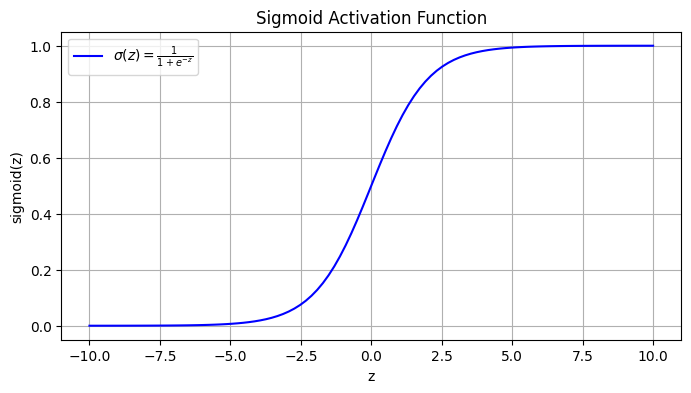

In [30]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

z = np.linspace(-10,10,100)

s = sigmoid(z)
plt.figure(figsize=(8, 4))
plt.plot(z, s, label=r'$\sigma(z) = \frac{1}{1 + e^{-z}}$', color='blue')
plt.title("Sigmoid Activation Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid(True)
plt.legend()
plt.show()


Here what we can see is:
- The **S-shaped curve** (sigmoid) squashes any real-valued input into a number between **0 and 1**.
- At $ z = 0 $, the output is exactly **0.5**.
- As $ z \to +\infty $, the output approaches **1**.
- As $ z \to -\infty $, the output approaches **0**.

#### Multinomial Logistic Regression ####

Many times our data is not binary and the target variables can be more than 2 (also not ordered). In such cases, we use the **softmax function** instead of the sigmoid function. The softmax function generalizes the logistic function to multiple classes and ensures that the predicted probabilities for each class sum to 1.

The softmax function for class \( k \) is given by:


$$\text{softmax}(\mathbf{z_i}) = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}}$$

Where:

- $ z_i $ is the input to the softmax function for class $k$,
- $ K $ is the total number of classes,
- The denominator sums over all possible classes to normalize the outputs into a valid probability distribution.


The next example is close to the one before but contains more than 2 possible discrete outputs

In [31]:

digits = datasets.load_digits()

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

reg = linear_model.LogisticRegression(max_iter=10000, random_state=0)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print(f"Logistic Regression model accuracy: {metrics.accuracy_score(y_test, y_pred) * 100:.2f}%")

Logistic Regression model accuracy: 96.66%


### Evaluation ###
To evaluate the performance of a multinomial logistic regression model, we typically use:

- **Accuracy**: The proportion of correctly predicted labels out of all predictions.
- **Confusion Matrix**: A table showing correct and incorrect predictions broken down by each class.
- **Precision, Recall, F1-Score**: Useful for imbalanced datasets to measure performance per class.
- **Log Loss (Cross-Entropy Loss)**: Measures how close the predicted probabilities are to the true labels.

Scikit-learn provides tools like `classification_report`, `confusion_matrix`, and `log_loss` to help with this evaluation.

More you can read [here](https://www.geeksforgeeks.org/understanding-logistic-regression/)

### Variance inflation vactor ###

## Decision trees ##

Decision trees are used both in regression and classification tasks, helping us to take easy decisions. It splits the data into subsets based on feature values. It has **nodes, branches and leafes** where each node is a feature, each branch is a decision, each leaf is a prediction. The difference between regression trees and classification trees is that classification trees **classifies into categories**, whereas regression trees predicts a numeric value.

![decision tree](https://storage.googleapis.com/algodailyrandomassets/curriculum/Data_Science/Getting%20to%20Know%20Decision%20Trees/decision_tree.png)

Considering the fact that there are many different features a reasonable question is from which one we should start. There are a couple of methods to decide.
- **Gini impurity** (classification)
- **Entropy / Information Gain** (classification)
- **MSE**(regression)

##pruning

###  Gini Impurity Explained

**Gini Impurity** is a metric used in decision trees (especially in classification tasks) to evaluate how "pure" a node is.

A node is **pure** if all the data points in it belong to the same class. The Gini Impurity measures the probability that a randomly chosen element would be incorrectly labeled if it were randomly labeled according to the distribution of labels in the node.

![Gini](https://storage.googleapis.com/lds-media/images/gini-impurity-diagram.width-1200.png)


#### Formula:

For a node with $ K $ classes, Gini Impurity is defined as:

$$
G = 1 - \sum_{i=1}^{K} p_i^2
$$

Where:
- $ p_i $ is the probability (or proportion) of class $ i $ in the node.
- $ K $ is the number of classes.


That means:

- If all examples belong to **one class**, \( G = 0 \) → **perfect purity**.
- If the classes are **evenly distributed**, \( G \) is at its **maximum** → **high impurity**.



#### Example:

Suppose we have a node with the following distribution:

- 4 samples of class A
- 6 samples of class B

Then:

$$
p_A = \frac{4}{10}, \quad p_B = \frac{6}{10}
$$

$$
G = 1 - (0.4^2 + 0.6^2) = 1 - (0.16 + 0.36) = 1 - 0.52 = 0.48
$$

So the impurity of this node is **0.48**.


####  What is the advantage?

- Gini is fast to compute and works well in practice.
- It is the default in many libraries (e.g., `sklearn.tree.DecisionTreeClassifier`).



### Information Entropy in Decision Trees

**Entropy** is a fundamental concept from information theory that measures the amount of **uncertainty** or **impurity** in a dataset.

In decision trees (like ID3), entropy is used to decide which feature to split on by measuring how "mixed" the class labels are at a given node.


### The formula ###

For a dataset with $ K $ classes and probabilities $ p_1, p_2, ..., p_K $:

$
\text{Entropy}(S) = - \sum_{i=1}^{K} p_i \log_2(p_i)
$

Where:
- $ p_i $ is the proportion of elements in class $ i $
- The log is base 2 (measuring bits of information)


Keeping that in mind:


- If the dataset is **pure** (all examples belong to one class), entropy = 0 (no uncertainty).
- If the dataset is **uniformly mixed** (e.g., 50% class A, 50% class B), entropy is **maximum**.

| Class Distribution         | Entropy       |
|---------------------------|---------------|
| 100% A                    | 0             |
| 50% A, 50% B              | 1 (max for 2 classes) |
| 70% A, 30% B              | ~0.88         |



### In decision trees ###

When building a decision tree:
1. We calculate the **entropy of the parent node**.
2. We try different feature splits and compute the **entropy of the child nodes**.
3. We use **Information Gain** to measure how much the split reduces entropy:

$
\text{Information Gain} = \text{Entropy(parent)} - \sum \left( \frac{|S_v|}{|S|} \cdot \text{Entropy}(S_v) \right)
$

Where:
- $ S $ is the set before the split
- $ S_v $ are the subsets created by splitting on a feature

We choose the feature with the **highest information gain** for the split.



That means:

- **Entropy** quantifies uncertainty in the class labels.
- **Information Gain** is the reduction in entropy after a dataset is split.
- **The goal is to build a tree that splits data in a way that quickly reduces entropy and leads to pure leaf nodes.**


However we must note that overfitting is possible and reducing the entropy to 0 is not the best possible approach

### Example: Entropy and Information Gain

We want to decide whether to play tennis based on the weather. Here's a simplified dataset:

| Outlook   | Play Tennis |
|-----------|-------------|
| Sunny     | No          |
| Sunny     | No          |
| Overcast  | Yes         |
| Rainy     | Yes         |
| Rainy     | No          |
| Rainy     | Yes         |
| Overcast  | Yes         |
| Sunny     | Yes         |
| Sunny     | Yes         |
| Rainy     | Yes         |
| Sunny     | No          |
| Overcast  | Yes         |
| Overcast  | Yes         |
| Rainy     | No          |

We have:
- 9 "Yes"  
- 5 "No"  
- Total: 14 samples


## Step 1: Total Entropy

$$
\text{Entropy}(S) = -p_{\text{Yes}} \log_2(p_{\text{Yes}}) - p_{\text{No}} \log_2(p_{\text{No}})
$$

$$
p_{\text{Yes}} = \frac{9}{14}, \quad p_{\text{No}} = \frac{5}{14}
$$

$$
\text{Entropy}(S) = -\frac{9}{14} \log_2\left(\frac{9}{14}\right) - \frac{5}{14} \log_2\left(\frac{5}{14}\right) \approx 0.940
$$


## Step 2: Entropy for "Outlook"

We divide the dataset by the values of the `Outlook` feature.

### Outlook = Sunny (5 samples):  
- 2 Yes, 3 No

$$
\text{Entropy}_{\text{Sunny}} = -\frac{2}{5} \log_2\left(\frac{2}{5}\right) - \frac{3}{5} \log_2\left(\frac{3}{5}\right) \approx 0.971
$$

### Outlook = Overcast (4 samples):  
- 4 Yes → Pure class

$$
\text{Entropy}_{\text{Overcast}} = -1 \cdot \log_2(1) = 0
$$

### Outlook = Rainy (5 samples):  
- 3 Yes, 2 No

$$
\text{Entropy}_{\text{Rainy}} = -\frac{3}{5} \log_2\left(\frac{3}{5}\right) - \frac{2}{5} \log_2\left(\frac{2}{5}\right) \approx 0.971
$$


### Step 3: Information Gain for "Outlook"

We calculate the weighted average entropy after the split:

$$
\text{Entropy}_{\text{after split}} = \frac{5}{14} \cdot 0.971 + \frac{4}{14} \cdot 0 + \frac{5}{14} \cdot 0.971
$$

$$
= 0.3475 + 0 + 0.3475 = 0.695
$$

Now compute Information Gain:

$$
\text{Information Gain} = \text{Entropy}_{\text{parent}} - \text{Entropy}_{\text{after split}}
$$

$$
\text{IG(Outlook)} = 0.940 - 0.695 = \mathbf{0.245}
$$


### Conclusion

- Entropy quantifies uncertainty (impurity) in class labels.
- Information Gain tells us how much entropy is reduced after a split.
- The feature with the **highest Information Gain** is chosen to split the node.

In the example shown we did not have to compare how different features would reduce the entropy for simplicity of the example.

In [1]:
## write it in code ##

### Problems with decision trees ###




#### 1. **Overfitting**
- Decision trees are prone to overfitting, especially when they are too deep. They can model the noise in the data, leading to poor generalization.

#### **Solution**: 
- Pruning and regularization (limiting tree depth, minimum samples for split).



#### 2. **Instability**
- A small change in the data can result in a completely different tree structure.

#### **Solution**:
- **Ensemble methods** like **Random Forests** or **Gradient Boosting** help stabilize predictions by averaging results from multiple trees.



#### 3. **High Variance**
- Decision trees have high variance and perform well on training data but poorly on unseen data (overfitting).

#### **Solution**:
- Ensemble techniques reduce variance, improving generalization.



#### 4. **Poor Handling of Complex Relationships**
- Decision trees struggle with complex, non-linear relationships and might not model data patterns effectively.

#### **Solution**:
- **Random Forest** or **Gradient Boosting** can capture complex relationships better.



#### 5. **Interpretability Issues in Deep Trees**
- While decision trees are easy to understand, deep trees can become complex and hard to interpret.

#### **Solution**:
- Limiting depth through pruning helps maintain interpretability.



#### Conclusion:
While decision trees are simple and effective, their limitations (overfitting, instability, and poor handling of complexity) can be overcome using **Random Forests** or **Gradient Boosting**, which aggregate multiple decision trees to improve stability and accuracy.


## Random forest ##

Now that we have already explained the basics of decision trees we will move to a better version of them. First of all let us go through the definition of a random forest.

#### What is it? 
A Random Forest is an ensemble learning technique that combines multiple decision trees to improve accuracy and reduce overfitting. It belongs to the family of bagging algorithms (Bootstrap Aggregating).

First of all **ensemble methods combine the predictions from multiple models to make a final prediction**
#### How do we do it?

#### 1. Bootstrapping (Sampling with Replacement)

- Randomly sample the original dataset **with replacement** to create multiple new training datasets.
- Each of these **bootstrap samples** may contain some **duplicated examples** from the original dataset.


#### 2. Training Multiple Decision Trees

- Build a separate **decision tree** for each bootstrap sample.
- Trees are **not built using all features**.
- At **each node**, only a **random subset of features** is considered for splitting.  
  → This introduces **additional randomness** and reduces correlation between trees.


#### 3. Making Predictions

- **For Classification**:  
  Each tree makes a class prediction → The final result is the **majority vote** across all trees.

- **For Regression**:  
  Each tree outputs a numerical value → The final result is the **average** of these outputs.



#### 4. Final Result

- The **Random Forest** model combines all the individual tree predictions to make a final prediction.
- This generally improves:
  - **Accuracy**
  - **Robustness**
  - **Generalization** over a single decision tree.


## Out-of-Bag (OOB) Evaluation

- When creating each bootstrap sample (training subset), **some data points are left out** — these are called **Out-of-Bag (OOB)** samples.
- On average, about **1/3 of the data** is not included in each bootstrap sample.
- These OOB samples are then used to **test the performance** of the corresponding tree.
- By aggregating the predictions for all OOB samples across all trees, we get a reliable estimate of the model’s **generalization error** — without needing a separate validation set.

###  Benefits:
- Efficient and **free validation** (no need for cross-validation).
- Helps prevent **overfitting** during training.


At the end having the generalization error we could **change the number of used feature** and create the best random forest possible. 


 Accuracy on Test Set: 1.0

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

 Out-of-Bag Score: 0.9166666666666666


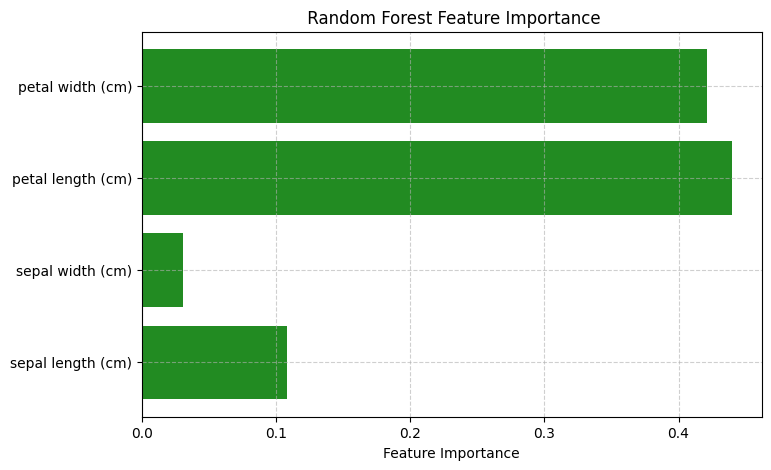

In [1]:
# 🌳 Random Forest Example with Iris Dataset

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(
    n_estimators=100,          
    oob_score=True,             # enable OOB evaluation
    random_state=42
)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print(" Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print(" Out-of-Bag Score:", model.oob_score_)


importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(8, 5))
plt.barh(features, importances, color='forestgreen')
plt.xlabel("Feature Importance")
plt.title(" Random Forest Feature Importance")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [39]:
import xgboost as xgb
dataset = pd.read_csv('data/Churn_Modelling.csv')
X = dataset.iloc[:,3:13]
y = dataset.iloc[:, 13].values
print(dataset.head(3))

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  


Now I am going to convert two of the features into category type since XGboost handles categorical features internally.

In [40]:
X['Geography'] = X["Geography"].astype('category')
X['Gender'] = X["Gender"].astype('category')

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.75,random_state=0)

xgb_train = xgb.DMatrix(X_train,y_train,enable_categorical=True)
xgb_test = xgb.DMatrix(X_test,y_test,enable_categorical=True)


In [44]:
import numpy as np
params = {
    'objective':'binary:logistic',
    'max-depth':3,
    'learning_rate':0.1,
}
n=50
model = xgb.train(params=params,dtrain=xgb_train,num_boost_round=50)

preds = model.predict(xgb_test)
preds = np.round(preds)
accuracy = accuracy_score(y_test,preds)
accuracy

C:\Users\mitko\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:29:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "max-depth" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


0.8584

### References ###
- https://www.bing.com/search?q=what+is+pruning+in+ml&cvid=36ac65e8385a446fbc35cccd24fdd0a4&gs_lcrp=EgRlZGdlKgYIABBFGDkyBggAEEUYOTIGCAEQABhAMgYIAhAAGEAyBggDEAAYQDIGCAQQABhAMgYIBRAAGEAyBggGEAAYQDIGCAcQABhA0gEIMzg5MmowajmoAgiwAgE&FORM=ANAB01&adppc=EDGEESS&PC=W069
- https://www.youtube.com/watch?v=J4Wdy0Wc_xQ